<a href="https://colab.research.google.com/github/siddahant/DESOPT/blob/Third/bayesian_optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

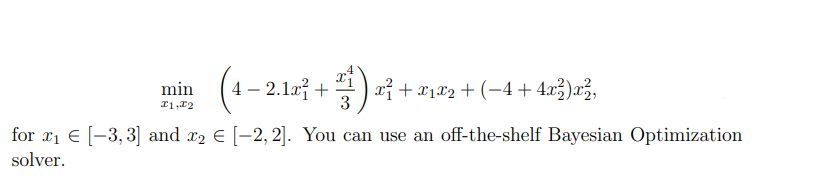

In [1]:
# Load Methods 
from gp import *
from plotters import *
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
# Load the Python scripts that contain the Bayesian optimization code
%run ./gp.py
%run ./plotters.py

In [2]:
# define Objective function 
fun= lambda x: ((4 - 2.1 * x[0] ** 2 + ((x[0] ** 4) / 3)) * x[0] ** 2) + x[0] * x[1] + (-4 + 4 * x[1] ** 2) * x[1] ** 2

In [3]:
#Specify our bounds
bounds = np.array([[-3, 3], [-2, 2]])

In [7]:
xp, yp = bayesian_optimisation(n_iters=50, 
                               sample_loss=fun, 
                               bounds=bounds,
                               n_pre_samples=10,
                               random_search=100000)
#Print our iterative process along with our solution and objective function 
print('Real minimum objective function : ', np.min(yp))
print('The manimum is at x1, x2 : ',xp[np.argmin(yp)])

Real minimum objective function :  -1.025327624737014
The manimum is at x1, x2 :  [-0.130183    0.71780393]


In [8]:
#Import necessary libraries 
X1 = np.linspace(-3, 3, 20)
X2 = np.linspace(-2, 2, 20)

# cartesian combination of X1 and X2 vectors
param_grid = np.array([[C, x2] for x2 in X2 for C in X1])
real = [fun(params) for params in param_grid]

print('Real minimum objective function :', np.min(real))
print('The manimum is at x1, x2 :', param_grid[np.array(real).argmin(), :])


Real minimum objective function : -1.0105464727082059
The manimum is at x1, x2 : [-0.15789474  0.73684211]


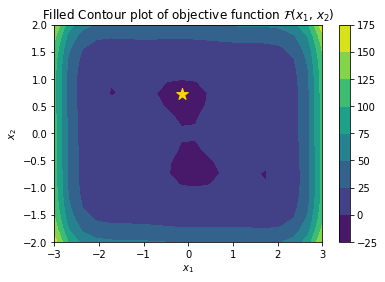

In [9]:
C, G = np.meshgrid(X1, X2)
result = np.array(real).reshape(C.shape)
plt.figure()
cp = plt.contourf(C, G, np.array(real).reshape(C.shape))
plt.colorbar(cp)
plt.scatter(xp[np.argmin(yp)][0], xp[np.argmin(yp)][1], marker='*', c='gold', s=150) # minumum value location
plt.title('Filled Contour plot of objective function $\mathcal{F }$($x_{1}$, $x_{2}$)')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.show()

The animation below shows the sequence of points selected, if we run the Bayesian optimization algorithm in the setting defined above. The star shows the value of  and  that result in the minumum value of objective function.

/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
/content/plotters.py:101: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8), sharex=True, sharey=True)
/content/plotters.py:10

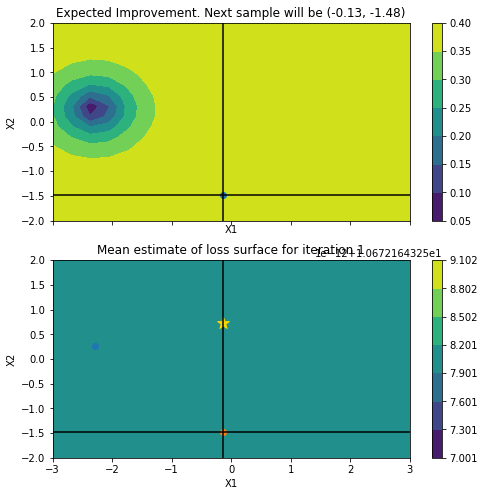

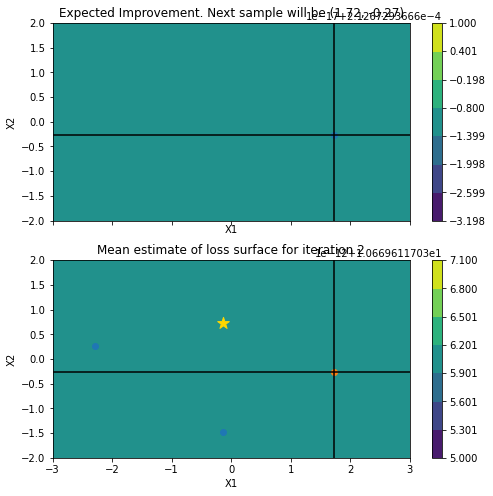

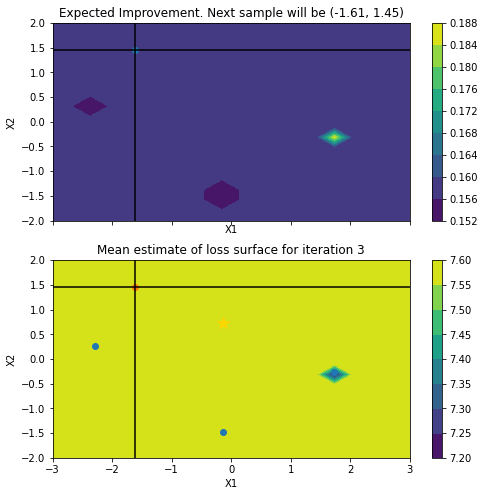

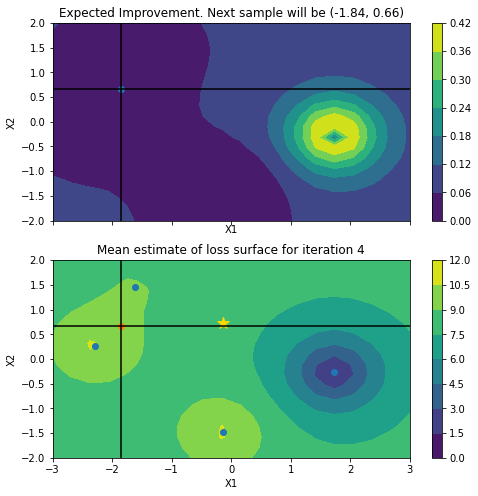

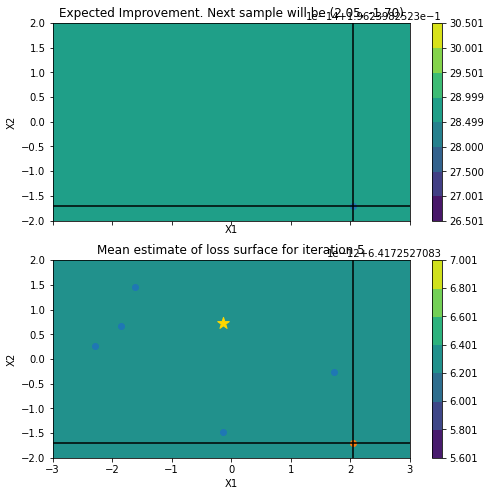

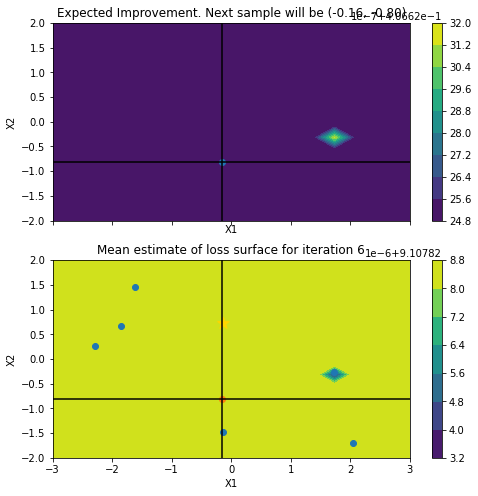

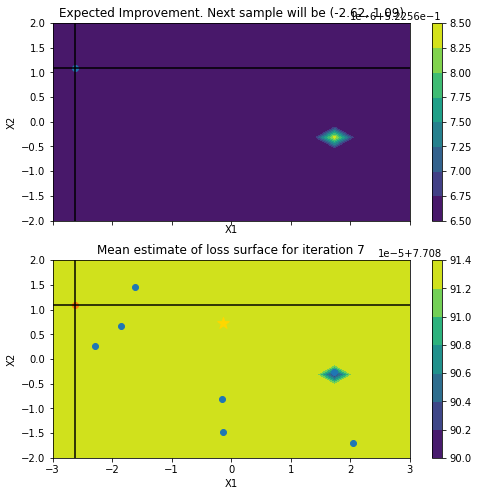

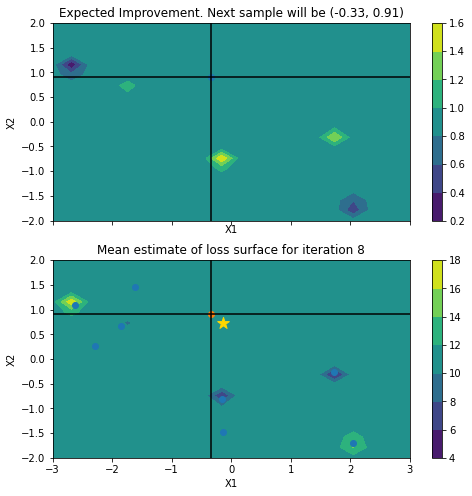

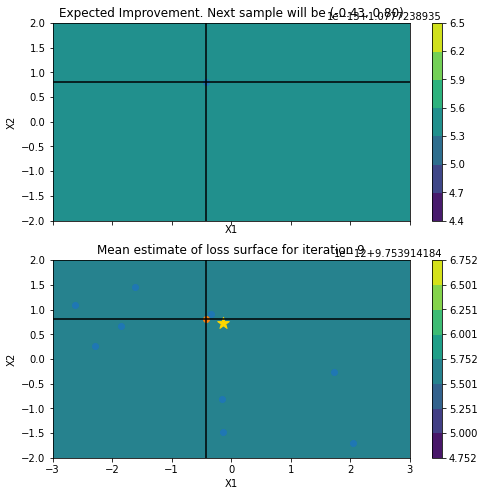

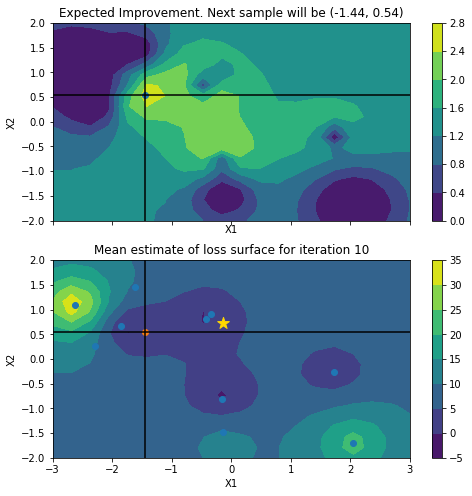

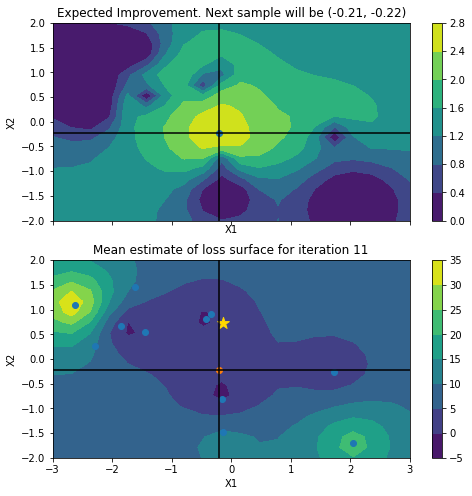

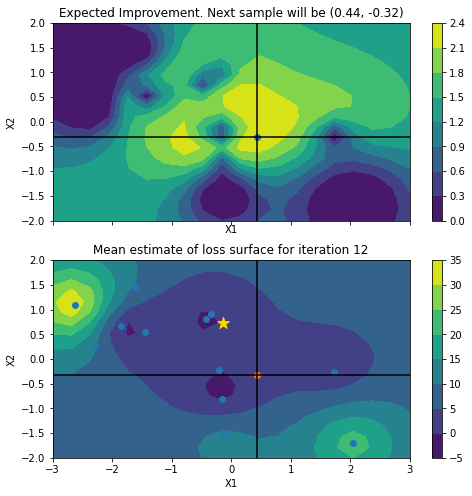

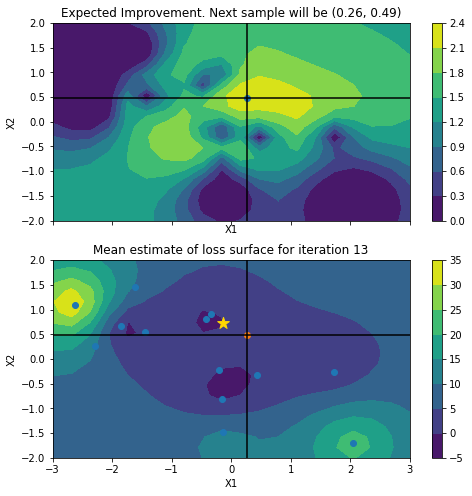

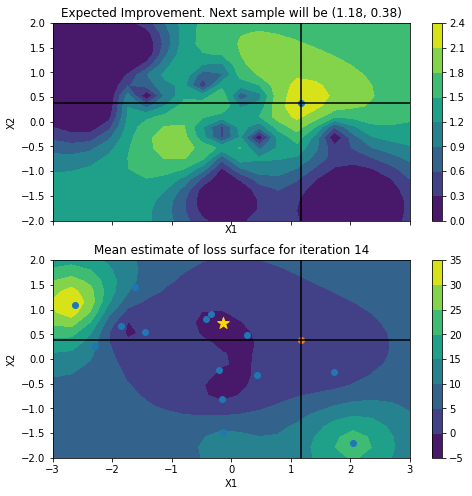

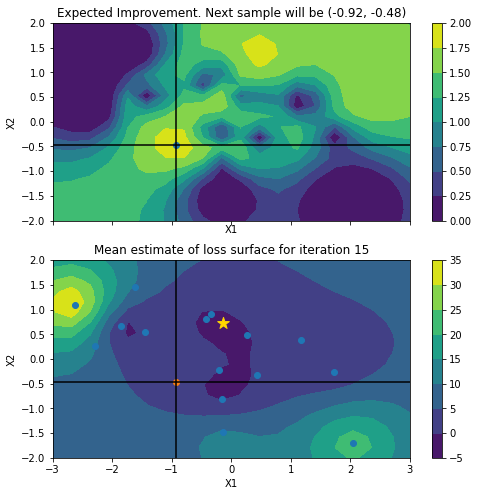

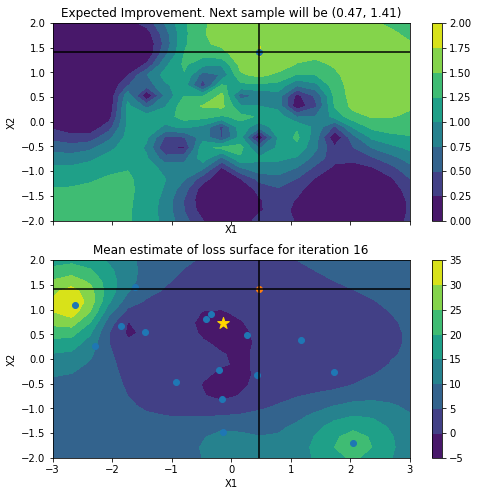

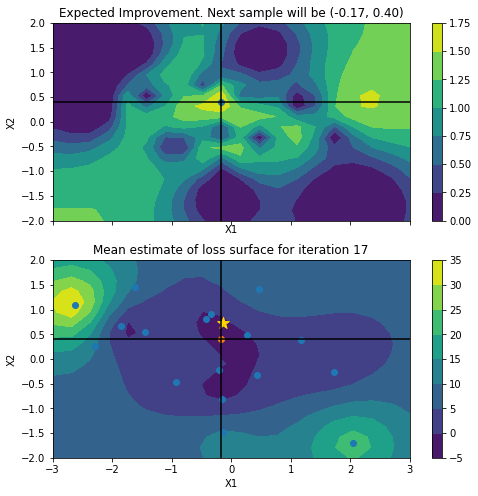

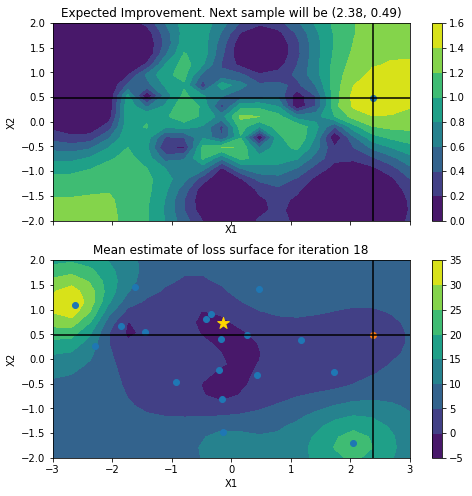

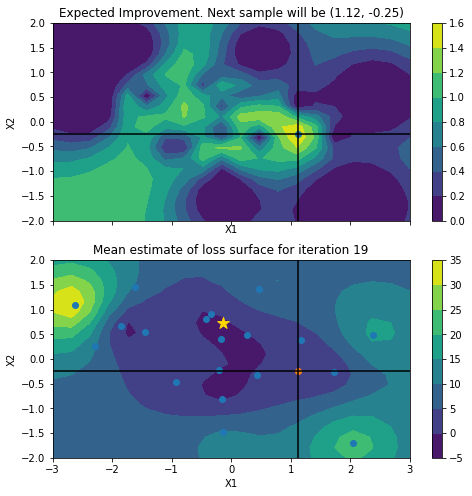

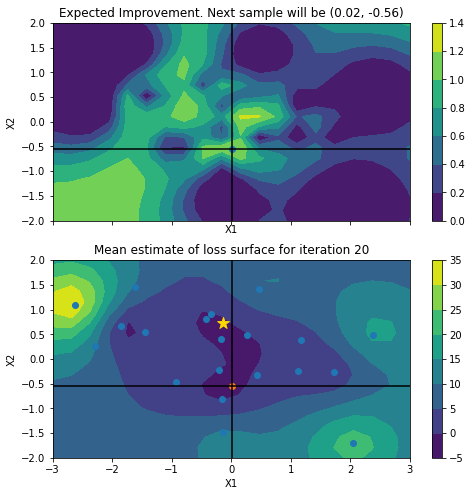

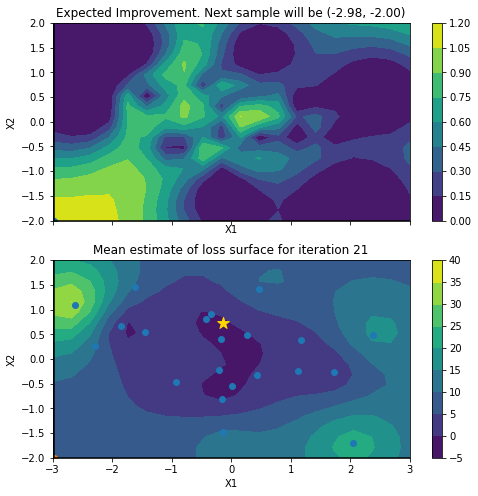

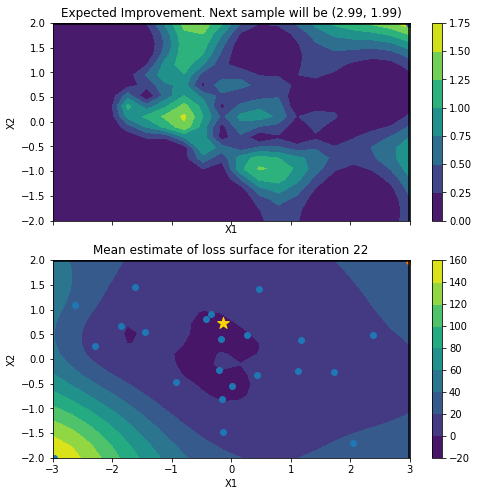

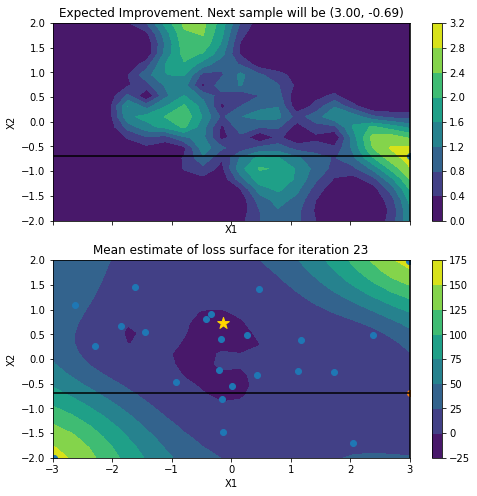

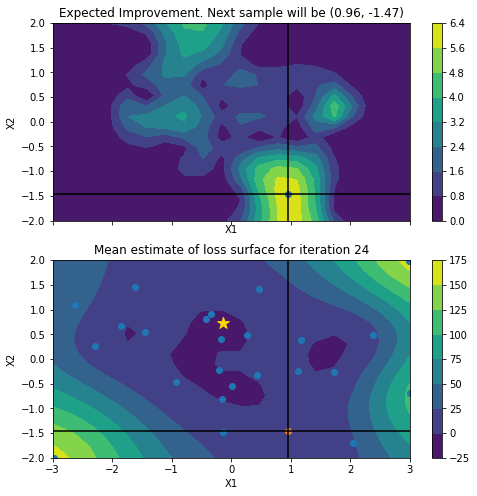

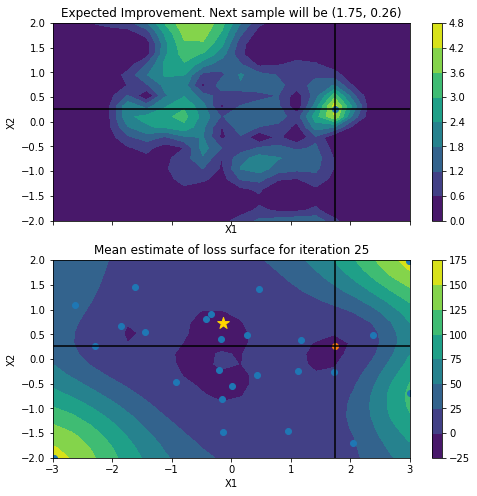

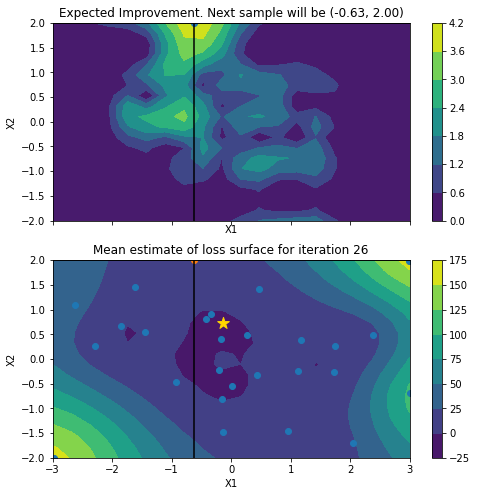

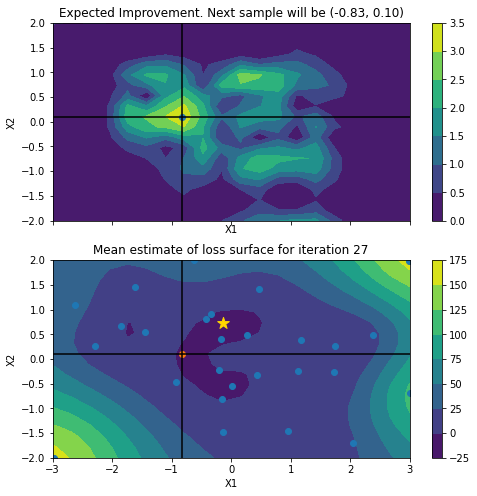

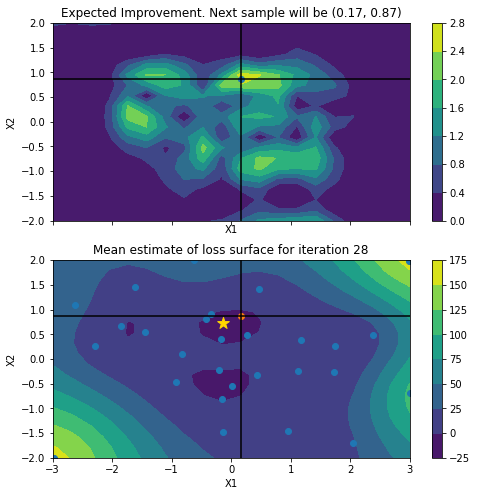

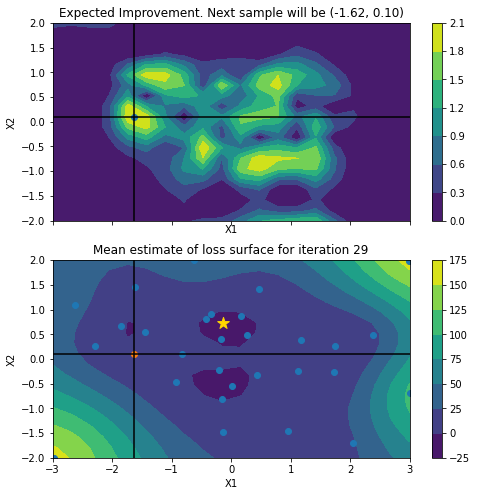

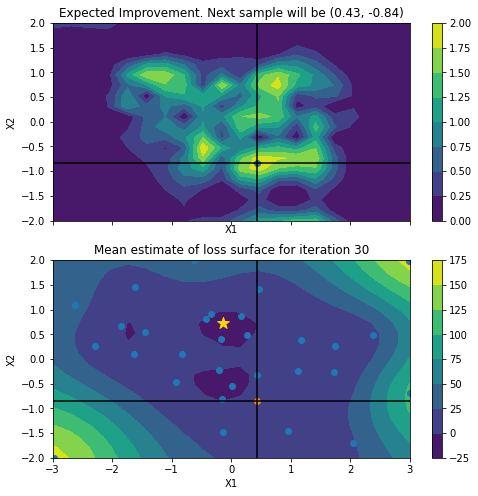

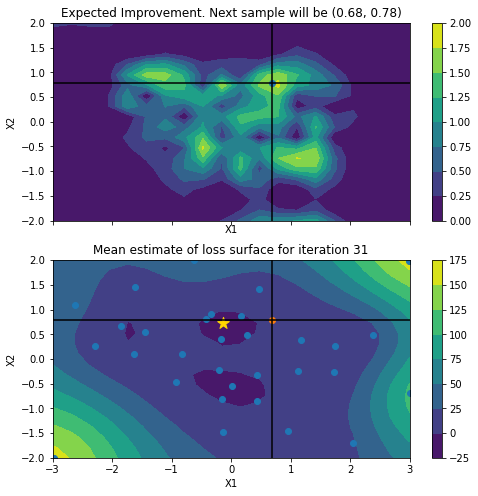

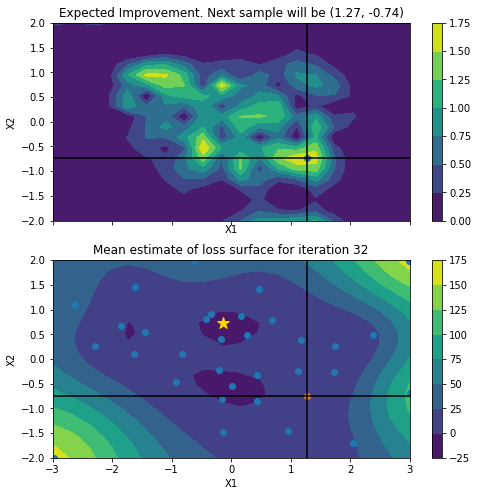

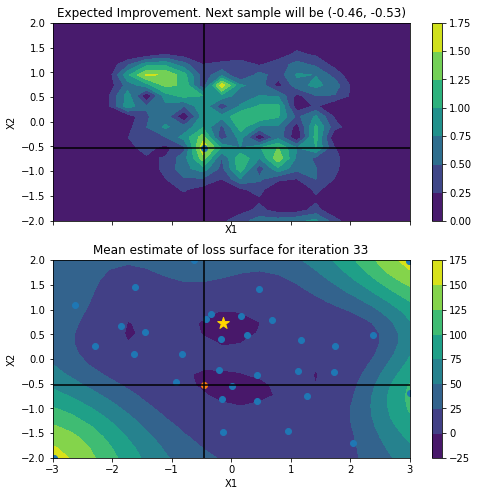

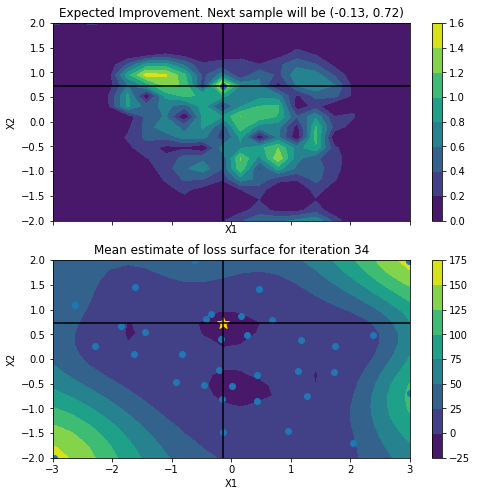

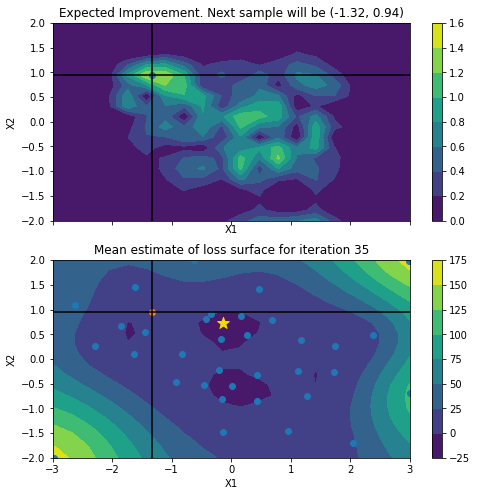

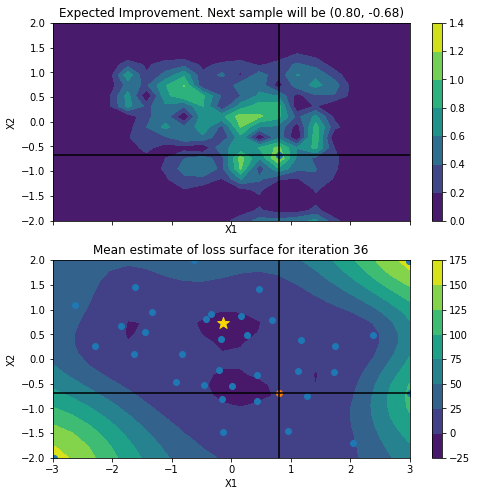

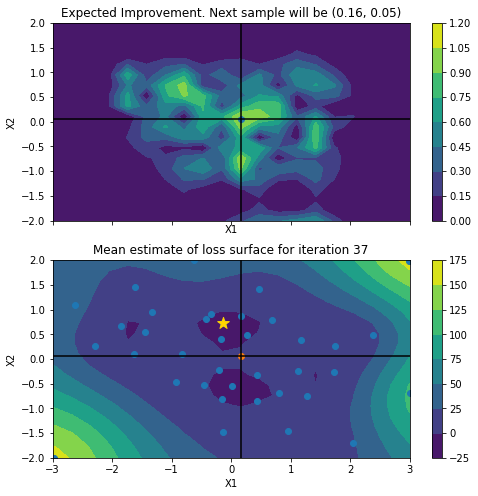

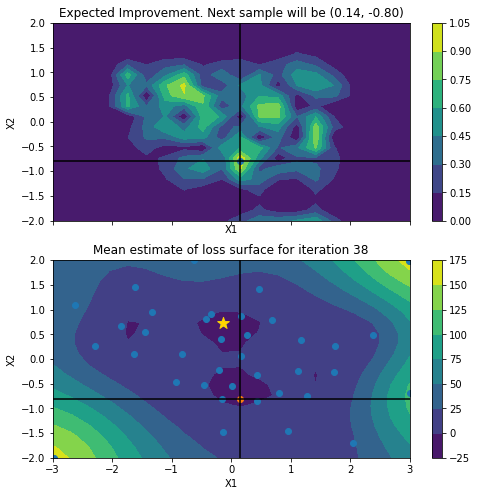

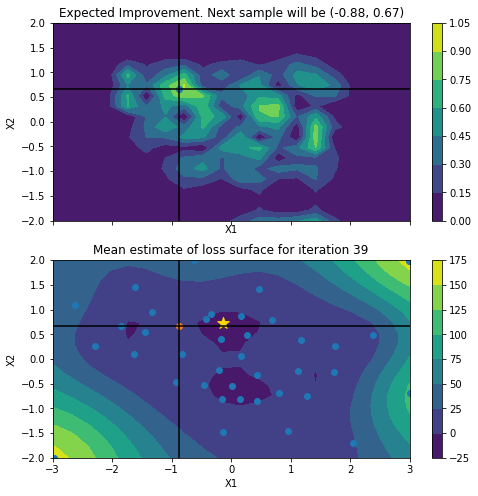

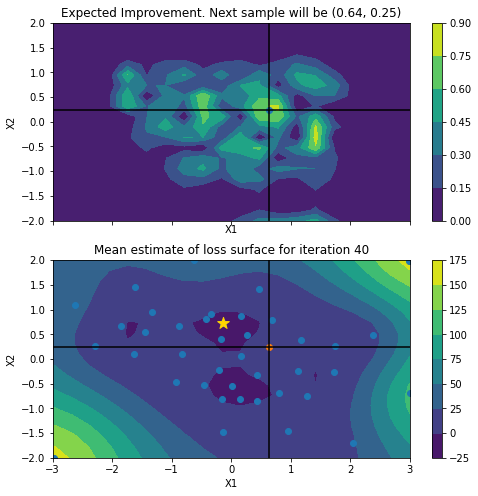

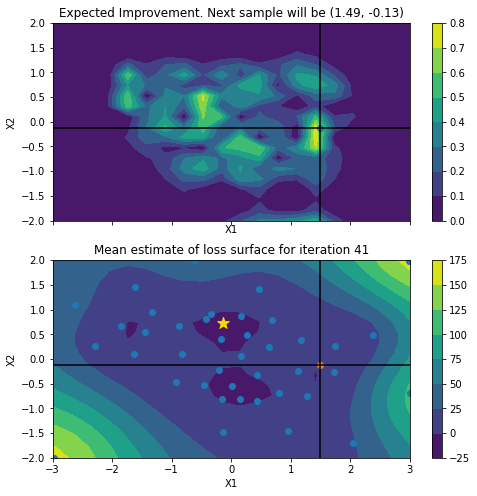

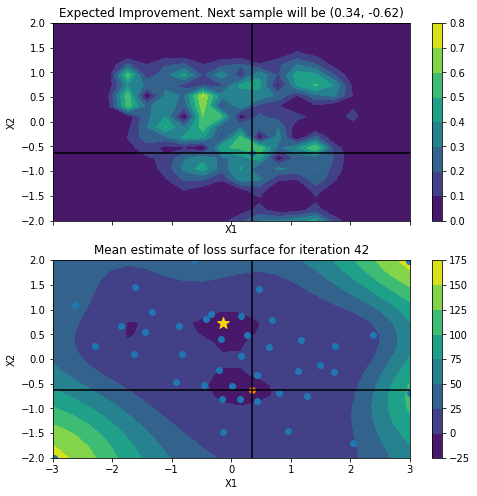

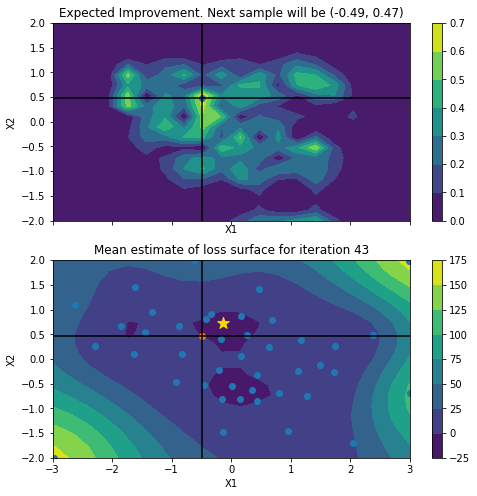

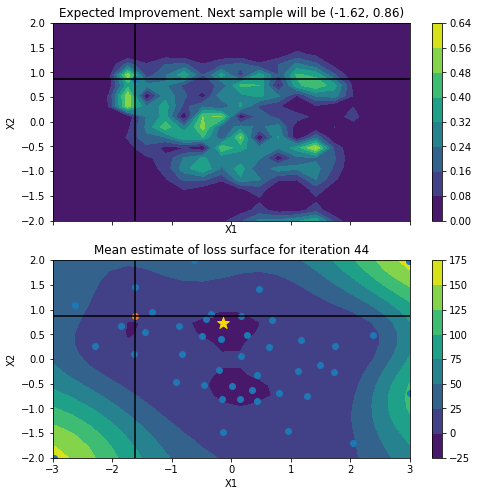

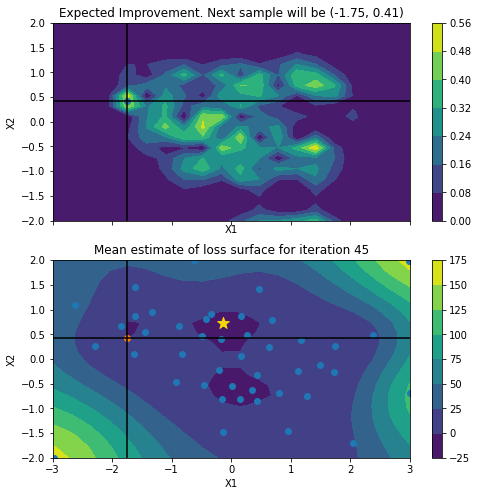

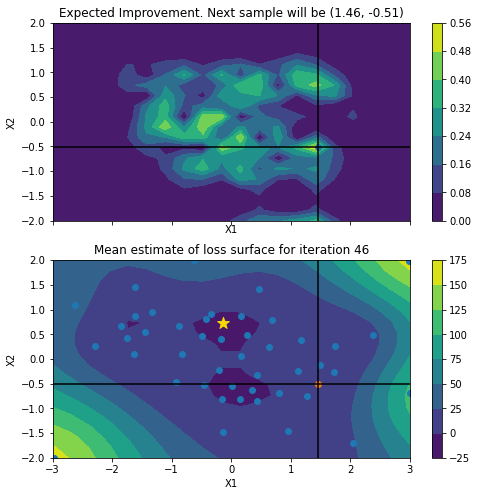

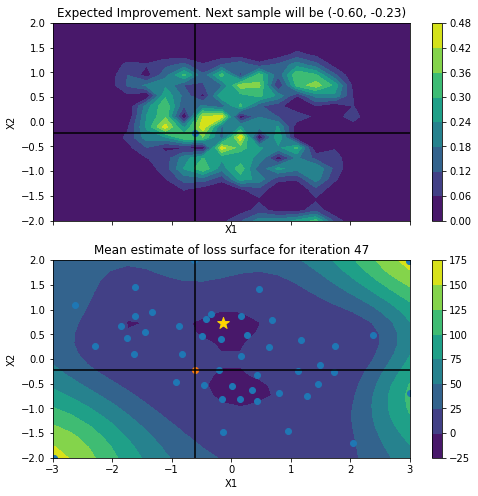

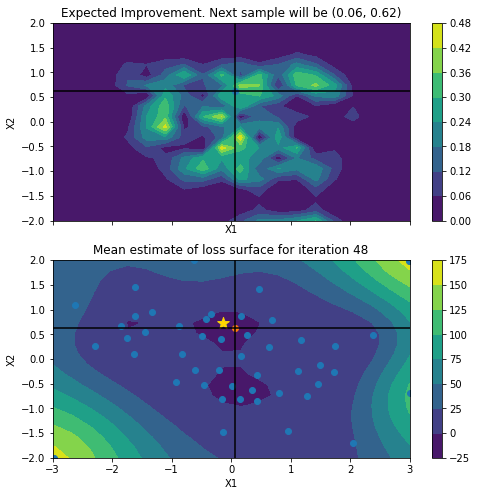

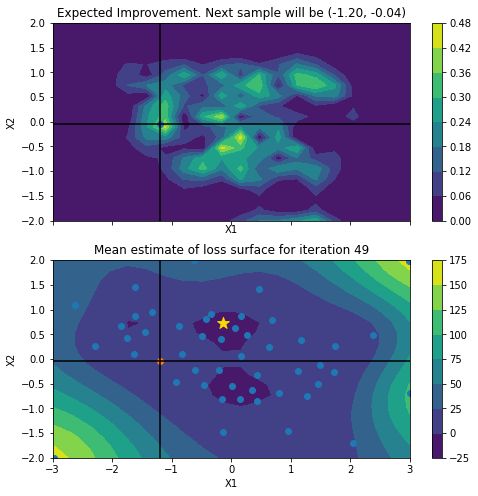

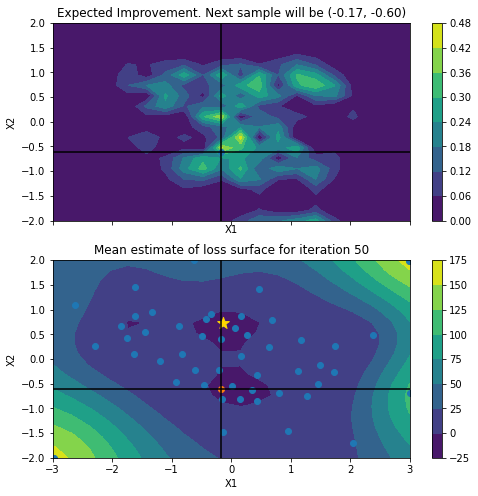

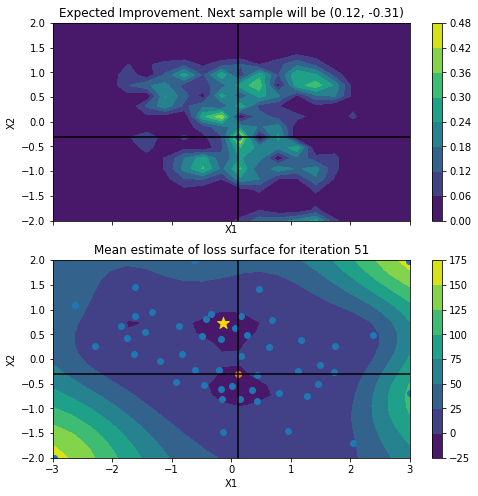

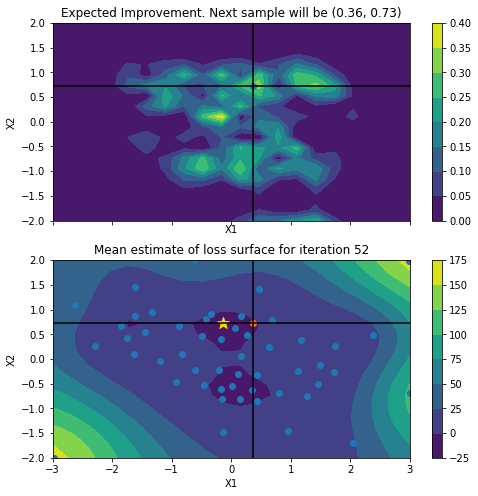

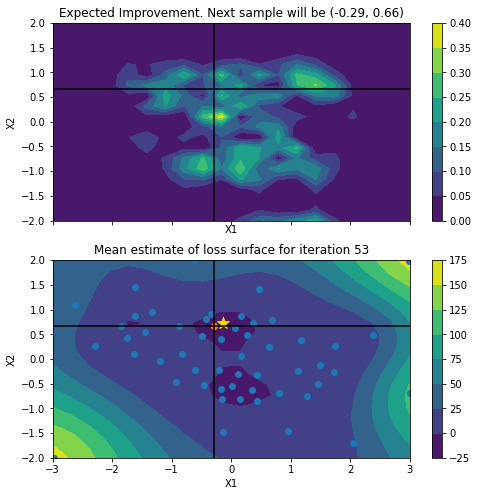

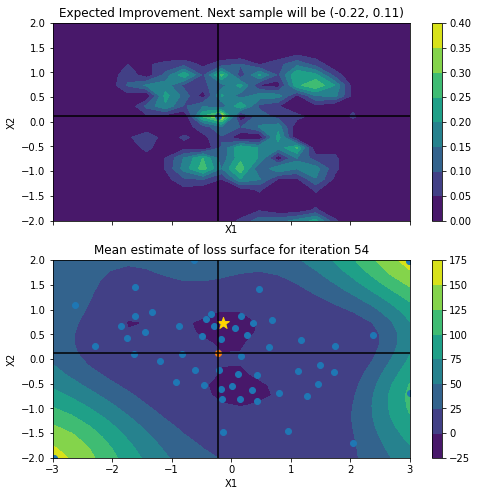

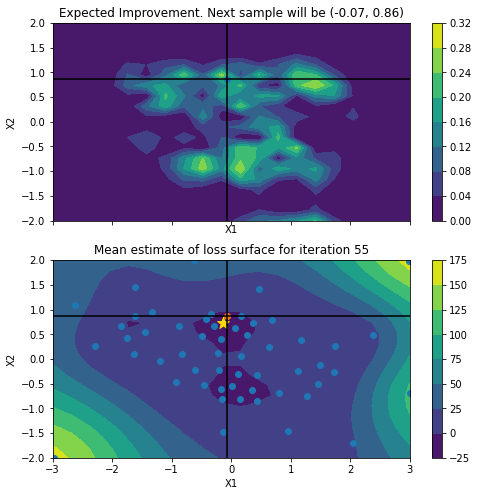

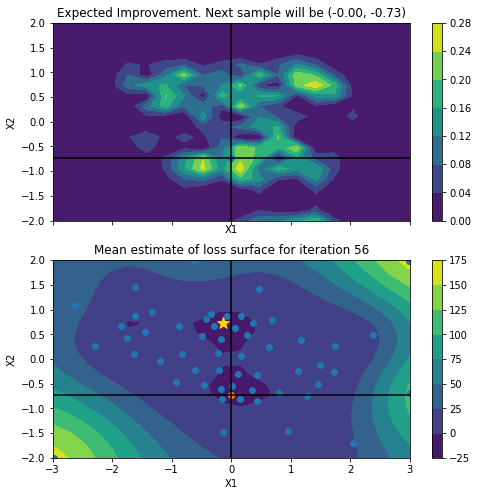

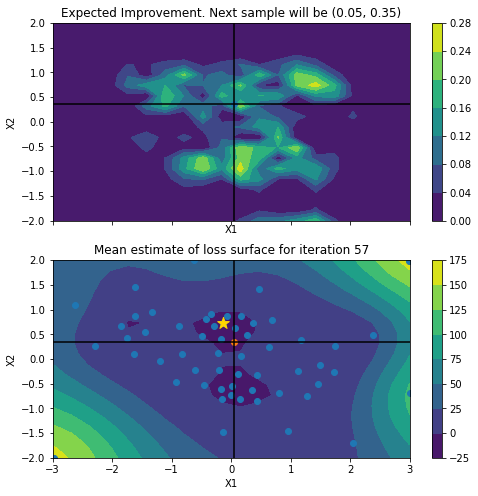

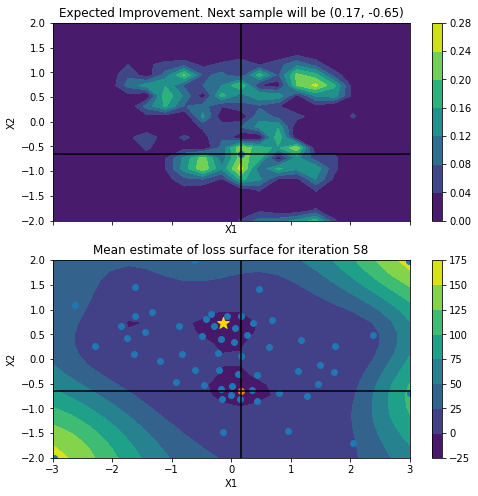

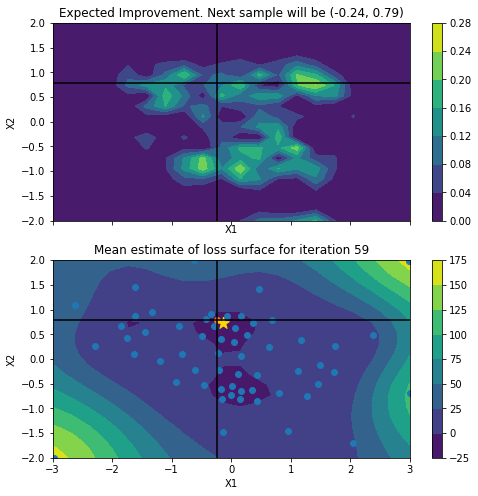

In [10]:
plot_iteration(X1, xp, yp, first_iter=0, second_param_grid=X2, optimum=[xp[np.argmin(yp)][0], xp[np.argmin(yp)][1]],greater_is_better=False)

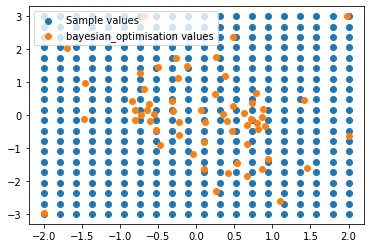

In [12]:
plt.scatter(param_grid[:,1],param_grid[:,0])
plt.scatter(xp[:,1],xp[:,0])
plt.legend(["Sample values","bayesian_optimisation values"])

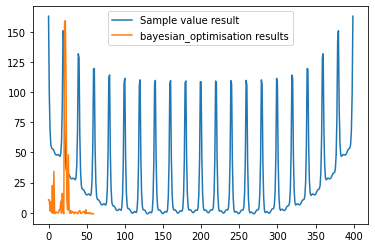

In [13]:

plt.plot(real)
plt.plot(yp)
plt.legend(["Sample value result","bayesian_optimisation results"])